C:\Users\iwona\AppData\Local\Temp/ipykernel_18756/3086582331.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_pokoj['ilosc'] = 1


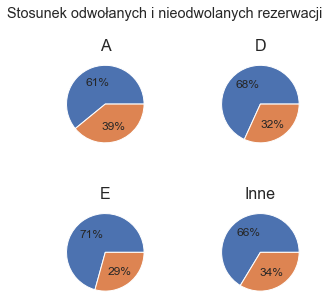

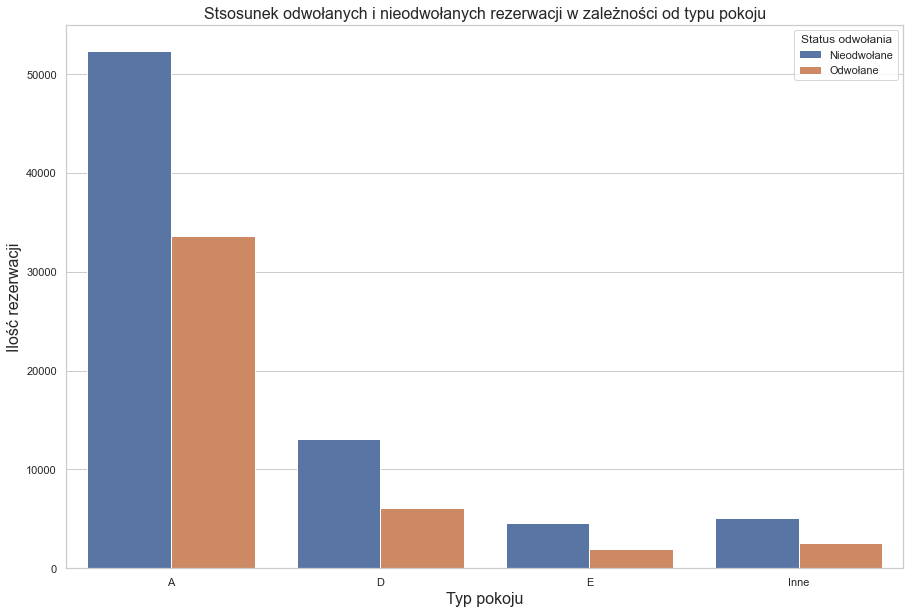

In [109]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

tabela_glowna = pd.read_csv('hotel_bookings_dane.csv')
tabela_glowna
tabela_glowna.isna().any()

tabela_pokoj = tabela_glowna[['is_canceled', 'reserved_room_type']]
tabela_pokoj['ilosc'] = 1
tabela_pokoj.groupby(by=['is_canceled','reserved_room_type']).count()#pokoj p jest zwsze odwoływany
tabela_pokoj_g = tabela_pokoj.groupby(by=['is_canceled','reserved_room_type'])

W = []
status_odwoalania = []
typ_pokoju = []

for key, value in tabela_pokoj_g:
    key = list(key)
    W.append(key)

for m, n in W:
    status_odwoalania.append(m)
    typ_pokoju.append(n)

rezerwacje = tabela_pokoj_g.count().values.tolist()
rezerwacje
ilosc_rezerwacji = []
for element in rezerwacje:
    for el in element:
        ilosc_rezerwacji.append(el)

wykres_4={
    'status_odwolania':status_odwoalania,
    'typ_pokoju':typ_pokoju,
    'ilosc_rezerwacji':ilosc_rezerwacji
    }
wykres_4
wykres_4_df = pd.DataFrame(wykres_4)
wykres_4_df

wykres_4_df_odw = wykres_4_df[wykres_4_df['status_odwolania'] == 1]
wykres_4_df_odw
wykres_4_df_nieodw = wykres_4_df[wykres_4_df['status_odwolania'] == 0]
wykres_4_df_nieodw

wykres_4_caly = pd.concat([wykres_4_df_nieodw, wykres_4_df_odw]).reset_index(drop=True)
wykres_4_caly

tab_1 = wykres_4_caly[wykres_4_caly['ilosc_rezerwacji'] > 1001].reset_index(drop=True)
tab_1
tab_2 = wykres_4_caly[wykres_4_caly['ilosc_rezerwacji'] < 1000].reset_index(drop=True)
tab_2

tab_3 = tab_1[(tab_1['typ_pokoju'] != 'F') & (tab_1['typ_pokoju'] != 'G') & (tab_1['typ_pokoju'] != 'P')]
tab_3

tab_4 = tab_1[(tab_1['typ_pokoju'] == 'F') | (tab_1['typ_pokoju'] == 'G') | (tab_1['typ_pokoju'] == 'P')]
tab_4

tab_5 = pd.concat([tab_2, tab_4]).reset_index(drop=True)
tab_5
tab_5_g = tab_5.groupby(by='status_odwolania')
tab_5_g.sum()

tab_6 = pd.DataFrame({"status_odwolania": list(tab_5_g.sum().index),
                    "typ_pokoju": "Inne", 
                    "ilosc_rezerwacji": (list(tab_5_g.sum().values.tolist())[0][0], list(tab_5_g.sum().values.tolist())[1][0])})

tab_6

tab_7 = pd.concat([tab_3, tab_6]).reset_index(drop=True)

labels=["Nieodwołane","Odwołane"]
tab_7["status_odwolania"] = tab_7["status_odwolania"].map(dict(zip(range(0,2), labels)))
tab_7

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( 2, 2, figsize = (5,5))
fig.subplots_adjust(left=0.2, wspace=0.6)
fig.suptitle('Stosunek odwołanych i nieodwolanych rezerwacji')

ax1.pie(tab_7[tab_7['typ_pokoju']=='A']['ilosc_rezerwacji'], labels = None, autopct='%.0f%%')
ax1.set_title("A", fontsize=16)
ax2.pie(tab_7[tab_7['typ_pokoju']=='D']['ilosc_rezerwacji'], labels = None, autopct='%.0f%%')
ax2.set_title("D", fontsize=16)
ax3.pie(tab_7[tab_7['typ_pokoju']=='E']['ilosc_rezerwacji'], labels = None, autopct='%.0f%%')
ax3.set_title("E", fontsize=16)
ax4.pie(tab_7[tab_7['typ_pokoju']=='Inne']['ilosc_rezerwacji'], labels =None, autopct='%.0f%%')
ax4.set_title("Inne", fontsize=16)


f, ax = plt.subplots(figsize=(15, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x="typ_pokoju", y="ilosc_rezerwacji", hue="status_odwolania", data=tab_7)
# add_value_label(x, z)
plt.title("Stsosunek odwołanych i nieodwołanych rezerwacji w zależności od typu pokoju", fontsize=16)
plt.xlabel("Typ pokoju", fontsize=16)
plt.ylabel("Ilość rezerwacji", fontsize=16)
plt.legend(loc="upper right", title = "Status odwołania")


